Running for k = 1
Running for k = 2
Running for k = 3
Running for k = 4
Running for k = 5
Running for k = 6
Running for k = 7
Running for k = 8
Running for k = 9


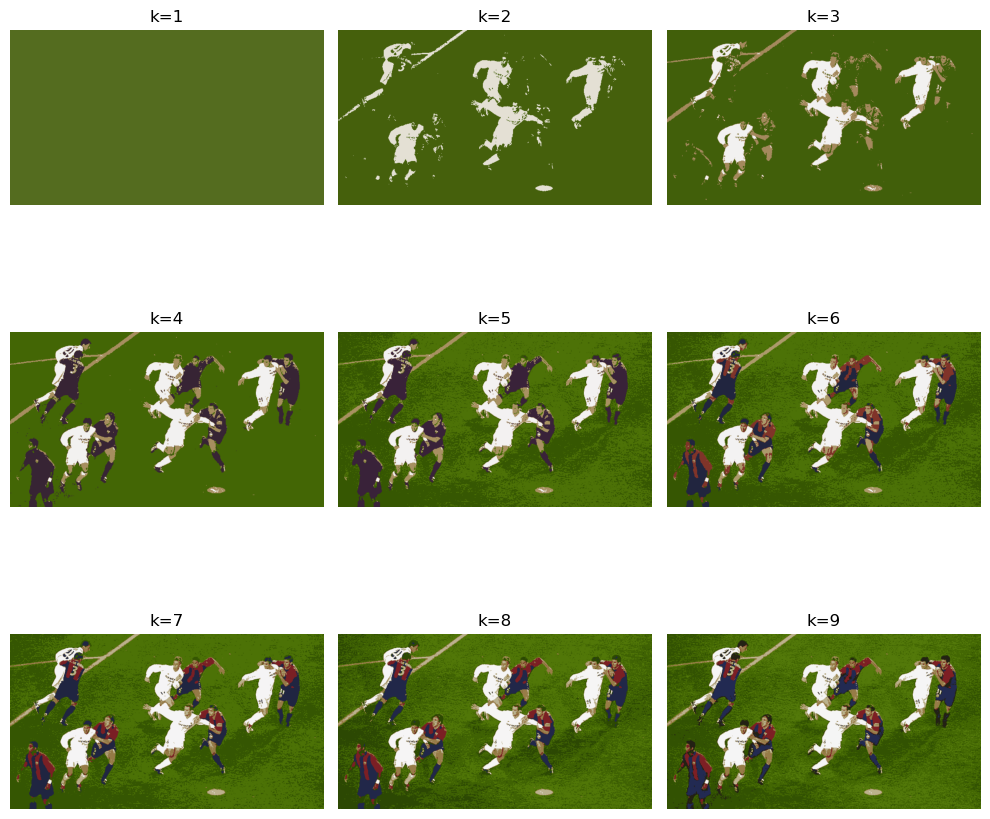

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans


# PLEASE UNCOMMENT THE LINE BELOW IF YOU DO NOT HAVE OPENCV INSTALLED, it will throw the import error if you do not.
# %pip install opencv-python

## Part A ##

import cv2

# Read the image
image = cv2.imread('soccer.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
pixels = image.reshape((-1, 3))


kvals = range(1, 10)
plt.figure(figsize=(10, 10))

for i, k in enumerate(kvals):
    print("Running for k =", k)
    kmeans = KMeans(n_clusters = k, n_init = 10)
    kmeans.fit(pixels)

    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    quantized_image = cluster_centers[labels].reshape(image.shape)  # reshape image for reconstruction
    quantized_image = quantized_image.astype(np.uint8)

    cv2.imwrite(f'./images/image_{k}.jpg', cv2.cvtColor(quantized_image, cv2.COLOR_RGB2BGR)) # convert back to jpg

    plt.subplot(3, 3, k)
    plt.imshow(quantized_image)
    plt.title(f'k={k}')
    plt.axis('off')

plt.tight_layout()
plt.savefig("./images/QAmosaic")

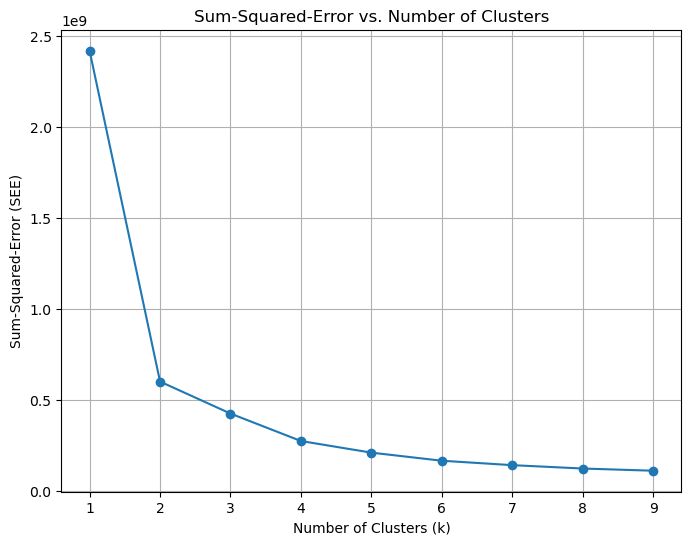

In [27]:
## Part B ## 

## NOTE ##
## This code takes about 1-2 minutes to execute, due to the added iterations. ##

sse_vals = []
for k in kvals:
    min_sse = float('inf')
    best_cluster_centers = None
    
    for i in range(5):
        kmeans = KMeans(n_clusters = k, n_init = 10)
        kmeans.fit(pixels)
        
        cluster_centers = kmeans.cluster_centers_
        labels = kmeans.labels_
        quantized_image = cluster_centers[labels].reshape(image.shape)
        sse = np.sum((image.astype(float) - quantized_image.astype(float)) ** 2)
        
        if sse < min_sse:
            min_sse = sse
            best_cluster_centers = cluster_centers
    
    sse_vals.append(min_sse)

# Plotting the SSE as a function of k
plt.figure(figsize=(8, 6))
plt.plot(kvals, sse_vals, marker='o', linestyle='-')
plt.title('Sum-Squared-Error vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum-Squared-Error (SEE)')
plt.grid()
plt.savefig("./images/QB")